# QMBS

In [340]:
import numpy as np
from qutip import *
from matplotlib import pyplot as plt
import scipy.sparse as sparse

In [230]:
N=16

In [373]:
state_list = ([basis(2, 1)] + [basis(2, 0)] + [basis(2, 0)] + [basis(2, 1)])* (int(N/4))
state_thermal = (([basis(2,1)] + [basis(2,0)])*int(N/2))
psi0 = tensor(state_list)
psi_thermal = tensor(state_thermal)

# Energy splitting term
omega = 0.05 * np.pi * np.ones(N)

# Interaction coefficients
Ja = 0.3 * np.pi * np.ones(N)
Je = 0.2 * np.pi * np.ones(N)
Jx = 0.03 * np.pi * np.ones(N)


In [ ]:
sx_list, sy_list, sz_list, sm_list,sp_list = [], [], [], [], []
for i in range(N):
    op_list = [qeye(2)] * N
    op_list[i] = sigmax()
    sx_list.append(tensor(op_list))
    op_list[i] = sigmay()
    sy_list.append(tensor(op_list))
    op_list[i] = sigmaz()
    sz_list.append(tensor(op_list))
    op_list[i] = sigmap()
    sp_list.append(tensor(op_list))
    op_list[i] = sigmam()
    sm_list.append(tensor(op_list))

# Hamiltonian - transition frequenmcy term
H = 0
for i in range(N):
    H += 0.5 * omega[i] * sp_list[i]*sm_list[i]

# Interaction terms
for n in range(N - 1):
    if n%2 ==0:
        H += -0.5 * Ja[n] * sp_list[n] * sm_list[n + 1]
        H += -0.5 * Ja[n] * sm_list[n] * sp_list[n + 1]
    else:
        H += -0.5 * Je[n] * sp_list[n] * sm_list[n + 1]
        H += -0.5 * Je[n] * sm_list[n] * sp_list[n + 1]
        
# Cross coupling terms
#for n in range(N):
   # H += -0.5 * Jx[n] * sp_list[n] * sm_list[(n + 4)%N]
   # H += -0.5 * Jx[n] * sm_list[n] * sp_list[(n + 4)%N]


In [375]:
times = np.linspace(0,25,400)
result = sesolve(H,psi0,times)
resultsThermal = sesolve(H,psi_thermal,times)
states = [ result.states]

In [376]:
VNEntropy=[]
thermalVN = []
thermalfidelity=[]
fourfidelity = []
rho0=ptrace(psi0,[0,1,2,3])
rho0_thermal = ptrace(psi_thermal,[0,1,2,3])
for Psi_T in result.states:
    rho=ptrace(Psi_T,[0,1,2,3])
    VNEntropy.append(entropy_vn(rho))
    fourfidelity.append(fidelity(rho0,rho))
for Psi_T in resultsThermal.states:
    rho=ptrace(Psi_T,[0,1,2,3])
    thermalVN.append(entropy_vn(rho))
    thermalfidelity.append(fidelity(rho0_thermal,rho))
    

In [377]:
exp_sz_t_scar = expect(sz_list, result.states)
exp_sz_0_scar = expect(sz_list,psi0)
exp_sz_t2_scar=[]
for i in range(len(exp_sz_0_scar)):
    exp_sz_t2_scar.append(exp_sz_0_scar[i]*exp_sz_t_scar[i])
imbalance =  1/N* sum(exp_sz_t2_scar)

In [378]:
exp_sz_t_thermal = expect(sz_list, resultsThermal.states)
exp_sz_0_thermal = expect(sz_list,psi_thermal)
exp_sz_t2_thermal=[]
for i in range(len(exp_sz_0_thermal)):
    exp_sz_t2_thermal.append(exp_sz_0_thermal[i]*exp_sz_t_thermal[i])
imbalance_thermal =  1/N* sum(exp_sz_t2_thermal)

In [379]:
fidelitylist = []
thermalfullFidelity= []

for i in range(len(result.times)):
    fidelitylist.append(np.vdot(result.states[0],result.states[i])*np.conj(np.vdot(result.states[0],result.states[i])))
    thermalfullFidelity.append(np.vdot(resultsThermal.states[0],resultsThermal.states[i])*np.conj(np.vdot(resultsThermal.states[0],resultsThermal.states[i])))

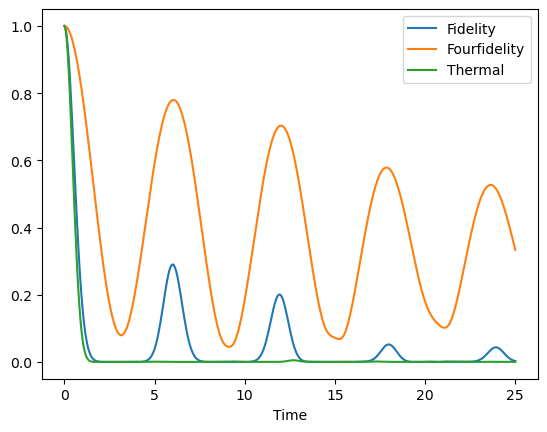

In [380]:
plt.plot(times,fidelitylist,label = 'Fidelity')
plt.plot(times,fourfidelity,label='Fourfidelity')
plt.plot(times, thermalfullFidelity,label='Thermal')
plt.xlabel('Time')
plt.legend()


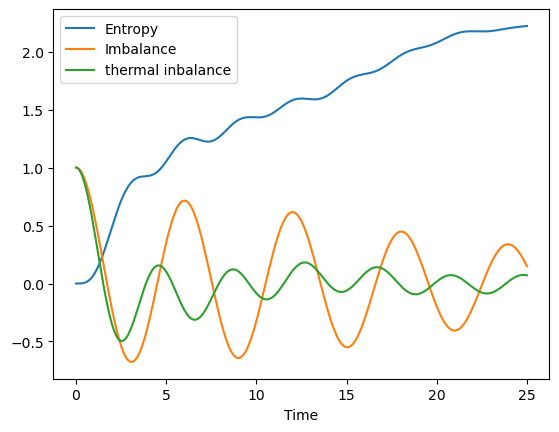

In [381]:
plt.plot(times,VNEntropy,label = 'Entropy')
plt.plot(times,imbalance, label = 'Imbalance')
plt.plot(times,imbalance_thermal, label = 'thermal inbalance')
plt.xlabel('Time')
plt.legend()

In [265]:
from scipy.fft import fft,fftfreq

In [382]:
intensity_imbalance = fft(imbalance,n=400)

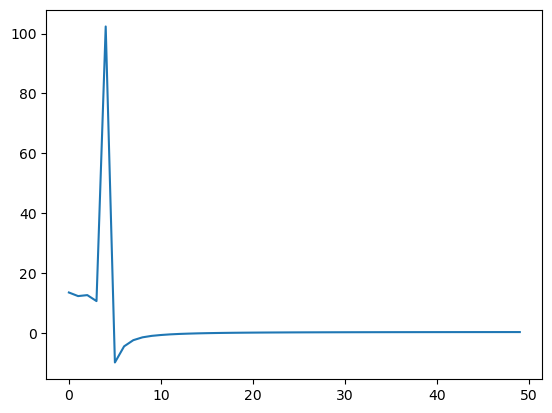

In [384]:
plt.plot(intensity_imbalance[:50])

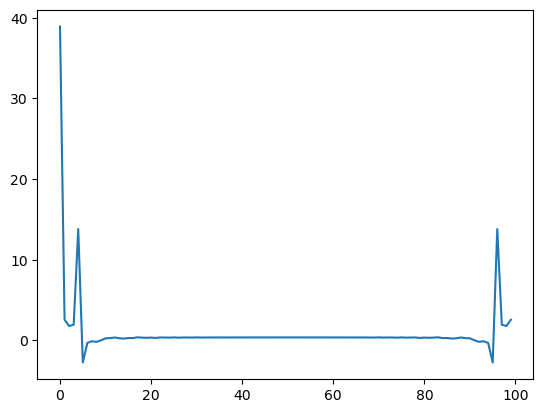

In [255]:
intensity_fidelity = fft(fourfidelity)
plt.plot(intensity_fidelity)

In [276]:
eigenvalues, eigensates = H.eigenstates(sparse=True, eigvals = 1000)

In [370]:
overlap = []
for i in range(len(vals)):
    overlap.append(np.log10((np.vdot(result.states[0],vecs[:,i])*np.conj(np.vdot(result.states[0],vecs[:,i])))**2))

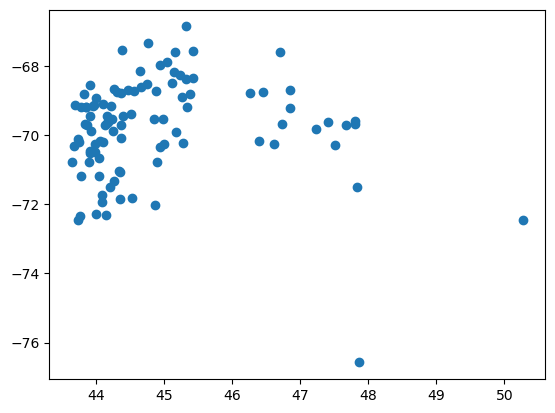

In [371]:
plt.scatter(vals,overlap)

In [297]:
np.vdot(psi0,eigensates[9])

0j

In [302]:
eigensates[4]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (65536, 1), type = ket
Qobj data =
  (32767, 0)	(0.28668055855205715-0.18726279487172734j)
  (49151, 0)	(0.32909056284342897-0.2149654614712322j)
  (57343, 0)	(0.16473746387200544-0.10760826635948666j)
  (61439, 0)	(0.01238050356582785-0.00808707681947113j)
  (63487, 0)	(-0.16825815231536917+0.10990801755678682j)
  (64511, 0)	(-0.2299344764913141+0.15019564955016507j)
  (65023, 0)	(-0.2013748222294574+0.13154017913856136j)
  (65279, 0)	(-0.10465397613108166+0.06836109209401008j)
  (65407, 0)	(0.10465397613106182-0.06836109209401817j)
  (65471, 0)	(0.201374822229456-0.13154017913855923j)
  (65503, 0)	(0.22993447649133195-0.15019564955016945j)
  (65519, 0)	(0.16825815231537783-0.10990801755679863j)
  (65527, 0)	(-0.012380503565846884+0.008087076819444573j)
  (65531, 0)	(-0.1647374638720312+0.10760826635945821j)
  (65533, 0)	(-0.3290905628434379+0.2149654614

In [299]:
result.states[0].overlap(eigensates[60])

0j

In [369]:
EigenEntropy =[]
for i in range(len(eigensates)):
    EigenEntropy.append(entropy_vn(ptrace(vecs[i], (range(int(N/2))))))
                        
    

TypeError: Input is not a quantum object

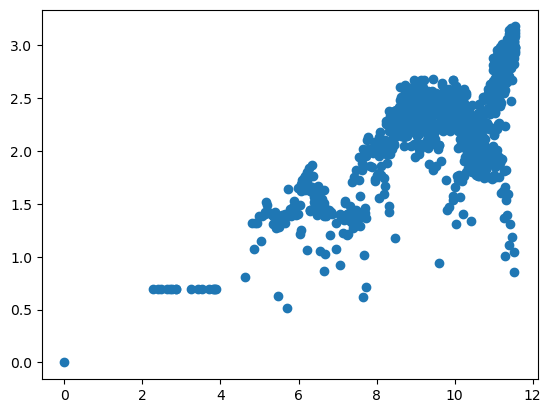

In [309]:
plt.scatter(eigenvalues,EigenEntropy)

In [ ]:
vals, vecs = sparse.linalg.eigsh(H.data,k=100, which = 'SM')

In [357]:
vecs[:,10]

IndexError: index 10 is out of bounds for axis 1 with size 6

In [363]:
h2 = H.data

In [372]:
vals

array([50.26548246, 47.86161297, 47.83501583, 47.80781425, 47.80243474,
       47.67779252, 47.51388433, 47.40778248, 47.23022594, 46.8460721 ,
       46.84770151, 46.733476  , 46.70094702, 46.61263128, 46.45135322,
       46.38844333, 46.26504932, 45.42176973, 45.42071608, 45.37956056,
       45.33878997, 45.3159514 , 45.31511655, 45.27142445, 45.26274734,
       45.23783013, 45.16720228, 45.15624175, 45.14867376, 45.10840983,
       45.04648593, 44.99241578, 44.98311682, 44.94404848, 44.93273512,
       44.89046824, 44.88330105, 44.8665612 , 44.84925727, 44.75623126,
       44.75198394, 44.66407162, 44.65172128, 44.56116778, 44.52531759,
       44.50613634, 44.47167746, 44.40086425, 44.38303794, 44.37089002,
       44.36370018, 44.35950961, 44.35811115, 44.34450062, 44.33341081,
       44.30300199, 44.26779454, 44.26110896, 44.24164462, 44.23356576,
       44.22566965, 44.20044423, 44.16939636, 44.16728668, 44.16367157,
       44.14910326, 44.12735591, 44.10660286, 44.09922256, 44.08

In [366]:
def remove_zero_rows(M):
    M = sparse.csr_matrix(M)
    num_nonzeros = np.diff(M.indptr)
    return M[num_nonzeros != 0]

In [367]:
remove_zero_rows(h2)

<65535x65536 sparse matrix of type '<class 'numpy.complex128'>'
	with 1081343 stored elements in Compressed Sparse Row format>

In [387]:
H.unit

<bound method Qobj.unit of Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (65536, 65536), type = oper, isherm = True
Qobj data =
  (0, 0)	(1.2566370614359172+0j)
  (1, 1)	(1.1780972450961724+0j)
  (1, 2)	(-0.47123889803846897+0j)
  (1, 16)	(-0.047123889803846894+0j)
  (1, 4096)	(-0.047123889803846894+0j)
  (2, 1)	(-0.47123889803846897+0j)
  (2, 2)	(1.1780972450961724+0j)
  (2, 4)	(-0.3141592653589793+0j)
  (2, 32)	(-0.047123889803846894+0j)
  (2, 8192)	(-0.047123889803846894+0j)
  (3, 3)	(1.0995574287564276+0j)
  (3, 5)	(-0.3141592653589793+0j)
  (3, 18)	(-0.047123889803846894+0j)
  (3, 33)	(-0.047123889803846894+0j)
  (3, 4098)	(-0.047123889803846894+0j)
  (3, 8193)	(-0.047123889803846894+0j)
  (4, 2)	(-0.3141592653589793+0j)
  (4, 4)	(1.1780972450961724+0j)
  (4, 8)	(-0.47123889803846897+0j)
  (4, 64)	(-0.047123889803846894+0j)
  (4, 16384)	(-0.047123889803846894+0j)
  (5, 3)	(-0.3141592653589793+0j

In [389]:
H

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (65536, 65536), type = oper, isherm = True
Qobj data =
  (0, 0)	(1.2566370614359172+0j)
  (1, 1)	(1.1780972450961724+0j)
  (1, 2)	(-0.47123889803846897+0j)
  (1, 16)	(-0.047123889803846894+0j)
  (1, 4096)	(-0.047123889803846894+0j)
  (2, 1)	(-0.47123889803846897+0j)
  (2, 2)	(1.1780972450961724+0j)
  (2, 4)	(-0.3141592653589793+0j)
  (2, 32)	(-0.047123889803846894+0j)
  (2, 8192)	(-0.047123889803846894+0j)
  (3, 3)	(1.0995574287564276+0j)
  (3, 5)	(-0.3141592653589793+0j)
  (3, 18)	(-0.047123889803846894+0j)
  (3, 33)	(-0.047123889803846894+0j)
  (3, 4098)	(-0.047123889803846894+0j)
  (3, 8193)	(-0.047123889803846894+0j)
  (4, 2)	(-0.3141592653589793+0j)
  (4, 4)	(1.1780972450961724+0j)
  (4, 8)	(-0.47123889803846897+0j)
  (4, 64)	(-0.047123889803846894+0j)
  (4, 16384)	(-0.047123889803846894+0j)
  (5, 3)	(-0.3141592653589793+0j)
  (5, 5)	(1.0995574287564